In [38]:
#question 1 from Multi Linear Regression
#Prepare a prediction model for profit of 50_startups data.
#Do transformations for getting better predictions of profit and
#make a table containing R^2 value for each prepared model.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [2]:
df= df.drop(columns=['State'],axis=1)


In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df.shape

(50, 4)

In [6]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [11]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [12]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF helps to understand the multicolinearty btw the veriabls 

In [13]:
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF DataFrame
print(vif_data)

          Variable       VIF
0        R&D Spend  8.384571
1   Administration  4.026406
2  Marketing Spend  7.593984


In [7]:
X=df[['R&D Spend','Administration','Marketing Spend',]]
Y=df[['Profit']]

In [8]:
import matplotlib.pyplot as plt

<Axes: xlabel='R&D Spend', ylabel='Administration'>

<Figure size 400x200 with 0 Axes>

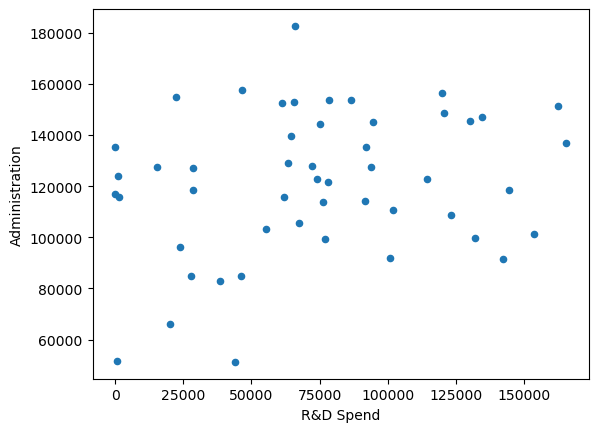

In [20]:
plt.figure(figsize=(4, 2))
df.plot(kind='scatter', x='R&D Spend', y='Administration')

<Axes: xlabel='R&D Spend', ylabel='Marketing Spend'>

<Figure size 500x300 with 0 Axes>

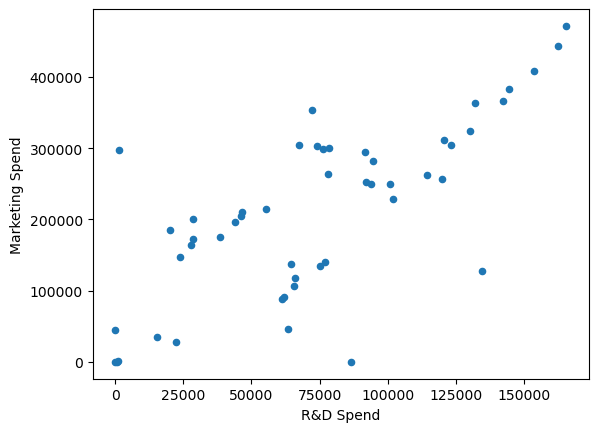

In [11]:
plt.figure(figsize=(5, 3))
df.plot(kind='scatter', x='R&D Spend', y='Marketing Spend')

<Axes: xlabel='Administration', ylabel='Marketing Spend'>

<Figure size 500x300 with 0 Axes>

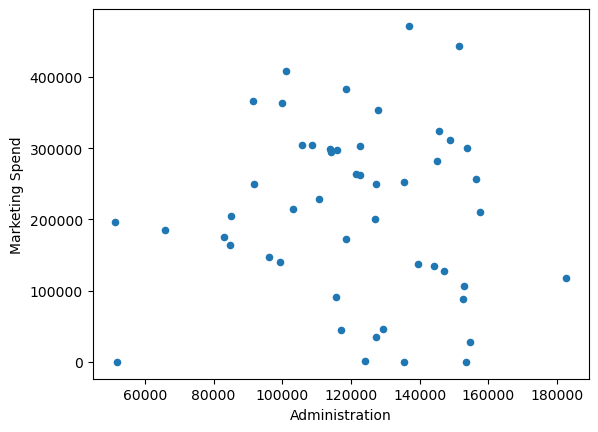

In [12]:
plt.figure(figsize=(5, 3))
df.plot(kind='scatter', x='Administration', y='Marketing Spend')

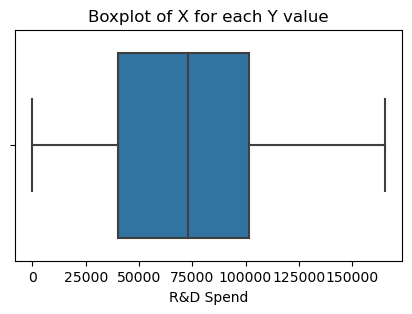

In [13]:
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.boxplot(x='R&D Spend', data=df)
plt.title('Boxplot of X for each Y value')
plt.show()


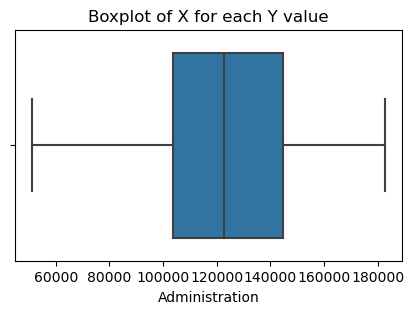

In [14]:
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.boxplot(x='Administration', data=df)
plt.title('Boxplot of X for each Y value')
plt.show()

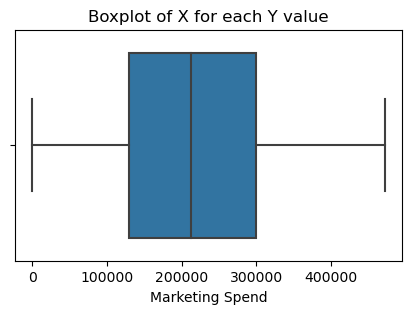

In [15]:
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.boxplot(x='Marketing Spend', data=df)
plt.title('Boxplot of X for each Y value')
plt.show()

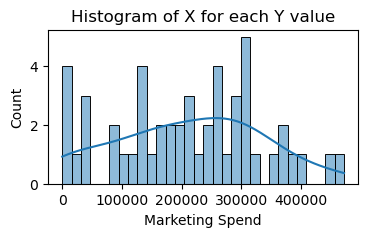

In [16]:
plt.figure(figsize=(4, 2))
sns.histplot(x='Marketing Spend', data=df, bins=30, kde=True)
plt.title('Histogram of X for each Y value')
plt.show()

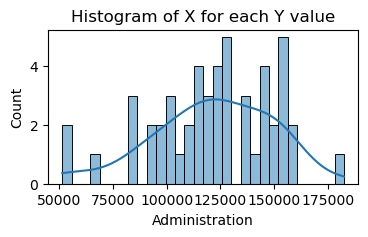

In [18]:
plt.figure(figsize=(4, 2))
sns.histplot(x='Administration', data=df, bins=30, kde=True)
plt.title('Histogram of X for each Y value')
plt.show()

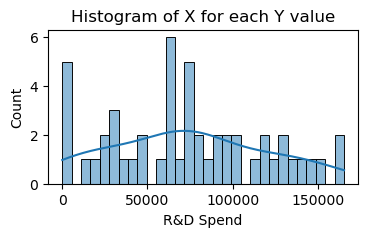

In [17]:
plt.figure(figsize=(4, 2))
sns.histplot(x='R&D Spend', data=df, bins=30, kde=True)
plt.title('Histogram of X for each Y value')
plt.show()

In [8]:
df.corr().values

array([[ 1.        ,  0.24195525,  0.72424813,  0.97290047],
       [ 0.24195525,  1.        , -0.03215388,  0.20071657],
       [ 0.72424813, -0.03215388,  1.        ,  0.74776572],
       [ 0.97290047,  0.20071657,  0.74776572,  1.        ]])

In [9]:
df.corr()['Profit'].sort_values().to_frame()

,Profit
Administration,0.200717
Marketing Spend,0.747766
R&D Spend,0.972900
Profit,1.000000


In [10]:
X1 = df[['R&D Spend']]
X2 = df[['R&D Spend','Marketing Spend']]
X3 = df[['R&D Spend','Marketing Spend','Administration']]

In [11]:
# step4: Data transformation for X
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)

In [12]:
# step6: Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(SS_X,Y)
Y_pred = LR.predict(SS_X)
Y_pred

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327],
       [163580.7805712 ],
       [158114.09666865],
       [160021.36304781],
       [151741.69969865],
       [154884.68410995],
       [135509.01636714],
       [135573.71296074],
       [129138.05418243],
       [127487.99166275],
       [149548.64633453],
       [146235.1599852 ],
       [116915.40540144],
       [130192.44720781],
       [129014.2268059 ],
       [115635.21636716],
       [116639.6692309 ],
       [117319.45164029],
       [114706.98171695],
       [109996.61522126],
       [113362.96611314],
       [102237.72506481],
       [110600.5753503 ],
       [114408.07145684],
       [101660.02600497],
       [101794.98345176],
       [ 99452.37293606],
       [ 97687.85627575],
       [ 99001.32898549],
       [ 97915.00780465],
       [ 89039.27374116],
       [ 90511.59956753],
       [ 75286.17458546],
       [ 89619.5377079 ],
       [ 696

In [15]:
# step8: Metrics
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(Y,Y_pred)
print("Mean squared Error", mse.round(3))
print("Root Mean squared Error", np.sqrt(mse).round(3))
print("R square", r2_score(Y,Y_pred).round(3))
print("residual analysis",(Y-Y_pred))

Mean squared Error 78417126.019
Root Mean squared Error 8855.344
R square 0.951
residual analysis           Profit
0    -259.422890
1    2635.291768
2    8903.110904
3    9205.289974
4   -5951.574183
5   -6589.660571
6   -1991.586669
7   -4268.763048
8     470.070301
9   -5124.724110
10  10612.933633
11   8685.687039
12  12447.465818
13   6819.358337
14 -16945.996335
15 -16318.119985
16  10077.524599
17  -4822.077208
18  -4747.326806
19   7141.643633
20   1834.360769
21  -6006.431640
22  -4354.731717
23  -1262.625221
24  -4810.926113
25   5166.614935
26  -4867.035350
27  -9399.761457
28   1622.353995
29   -790.343452
30    485.217064
31   -204.296276
32  -1573.488985
33  -1136.087805
34   7673.526259
35   5967.910432
36  15422.015415
37    329.602292
38  11531.629352
39  -2723.251977
40   3423.956009
41   2996.273761
42    878.078179
43   9591.940037
44    588.975084
45  17275.430313
46  -6675.456853
47  -3930.858983
48 -13497.978158
49 -33533.734111


In [16]:
# step4: Data transformation for X1
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X1)

In [17]:
# step6: Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(SS_X,Y)
Y_pred = LR.predict(SS_X)
Y_pred

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032],
       [161694.19683741],
       [164033.72501421],
       [160345.46724972],
       [152011.33380847],
       [154396.82286103],
       [136096.36397105],
       [135036.08586475],
       [129219.89081021],
       [127621.20411029],
       [151499.37407569],
       [146869.43093301],
       [115678.82583435],
       [129897.69412683],
       [127413.41482014],
       [122860.50313037],
       [114175.91374003],
       [116000.34693472],
       [112245.81324567],
       [106725.35677792],
       [114850.93206678],
       [104275.40289851],
       [113385.70276482],
       [110633.79960036],
       [105460.14271464],
       [105079.09459155],
       [101994.24845109],
       [101261.18102569],
       [103202.54108032],
       [ 96440.90176556],
       [ 88694.29012885],
       [ 88342.27936946],
       [ 73520.10196791],
       [ 86681.47714396],
       [ 663

In [18]:
# step8: Metrics
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(Y,Y_pred)
print("Mean squared Error", mse.round(3))
print("Root Mean squared Error", np.sqrt(mse).round(3))
print("R square", r2_score(Y,Y_pred).round(3))
print("residual analysis",(Y-Y_pred))

Mean squared Error 85120931.327
Root Mean squared Error 9226.101
R square 0.947
residual analysis           Profit
0    1972.536107
1    3853.348814
2   10933.732922
3   10532.986794
4   -4246.033450
5   -4703.076837
6   -7911.215014
7   -4592.867250
8     200.436192
9   -4636.862861
10  10025.586029
11   9223.314135
12  12365.629190
13   6686.145890
14 -18896.724076
15 -16952.390933
16  11314.104166
17  -4527.324127
18  -3146.514820
19    -83.643130
20   4298.116260
21  -4687.326935
22  -1893.563246
23   2008.633222
24  -6298.892067
25   3128.937101
26  -7652.162765
27  -5625.489600
28  -2177.762715
29  -4074.454592
30  -2056.658451
31  -3777.621026
32  -5774.701080
33    338.018234
34   8018.509871
35   8137.230631
36  17188.088032
37   3267.662856
38  14914.196684
39   -967.341511
40   4642.434863
41   4937.249992
42   2269.348359
43   7479.669520
44  -2778.821050
45  15038.693001
46   -665.935268
47  -6473.169141
48 -13822.557779
49 -34351.499141


In [19]:
# step4: Data transformation for X2
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X2)

In [20]:
# step6: Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(SS_X,Y)
Y_pred = LR.predict(SS_X)
Y_pred

array([[192800.45862502],
       [189774.65948019],
       [181405.37809703],
       [173441.30884249],
       [171127.62321762],
       [162879.31081217],
       [158028.13045422],
       [160455.73887656],
       [152317.8036728 ],
       [154343.8139353 ],
       [135011.91472396],
       [134638.87007529],
       [129218.39657898],
       [127812.20546461],
       [150192.49179713],
       [146032.71543309],
       [117025.89184753],
       [130829.44473222],
       [128882.19882756],
       [115816.41833283],
       [116650.89209156],
       [118384.17070857],
       [114990.38463925],
       [109886.18521692],
       [112552.18715137],
       [102612.90924225],
       [110990.79288437],
       [114978.60515008],
       [103125.01275975],
       [102440.42409014],
       [ 99085.21956154],
       [ 98314.54885378],
       [ 98864.66225433],
       [ 97600.73044466],
       [ 90262.64121898],
       [ 89776.4942853 ],
       [ 75824.23391247],
       [ 87974.01451829],
       [ 686

In [21]:
# step8: Metrics
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(Y,Y_pred)
print("Mean squared Error", mse.round(3))
print("Root Mean squared Error", np.sqrt(mse).round(3))
print("R square", r2_score(Y,Y_pred).round(3))
print("residual analysis",(Y-Y_pred))

Mean squared Error 78887897.006
Root Mean squared Error 8881.886
R square 0.95
residual analysis           Profit
0    -538.628625
1    2017.400520
2    9645.011903
3    9460.681158
4   -4939.683218
5   -5888.190812
6   -1905.620454
7   -4703.138877
8    -106.033673
9   -4583.853935
10  11110.035276
11   9620.529925
12  12367.123421
13   6495.144535
14 -17589.841797
15 -16115.675433
16   9967.038152
17  -5459.074732
18  -4615.298828
19   6960.441667
20   1823.137908
21  -7071.150709
22  -4638.134639
23  -1152.195217
24  -4000.147151
25   4791.430758
26  -5257.252884
27  -9970.295150
28    157.367240
29  -1435.784090
30    852.370438
31   -830.988854
32  -1436.822254
33   -821.810445
34   6450.158781
35   6703.015715
36  14883.956088
37   1975.125482
38  12597.741677
39  -1919.055275
40   3190.853969
41   3684.941295
42   1264.239426
43   9368.747148
44   -289.399308
45  17096.506020
46  -7419.050859
47  -4416.134221
48 -11734.242602
49 -33645.494462


In [22]:
# step4: Data transformation for X3
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X3)

In [23]:
# step6: Model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(SS_X,Y)
Y_pred = LR.predict(SS_X)
Y_pred

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327],
       [163580.7805712 ],
       [158114.09666865],
       [160021.36304781],
       [151741.69969865],
       [154884.68410995],
       [135509.01636714],
       [135573.71296074],
       [129138.05418243],
       [127487.99166275],
       [149548.64633453],
       [146235.1599852 ],
       [116915.40540144],
       [130192.44720781],
       [129014.2268059 ],
       [115635.21636716],
       [116639.6692309 ],
       [117319.45164029],
       [114706.98171695],
       [109996.61522126],
       [113362.96611314],
       [102237.72506481],
       [110600.5753503 ],
       [114408.07145684],
       [101660.02600497],
       [101794.98345176],
       [ 99452.37293606],
       [ 97687.85627575],
       [ 99001.32898549],
       [ 97915.00780465],
       [ 89039.27374116],
       [ 90511.59956753],
       [ 75286.17458546],
       [ 89619.5377079 ],
       [ 696

In [24]:
# step8: Metrics
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(Y,Y_pred)
print("Mean squared Error", mse.round(3))
print("Root Mean squared Error", np.sqrt(mse).round(3))
print("R square", r2_score(Y,Y_pred).round(3))
print("residual analysis",(Y-Y_pred))

Mean squared Error 78417126.019
Root Mean squared Error 8855.344
R square 0.951
residual analysis           Profit
0    -259.422890
1    2635.291768
2    8903.110904
3    9205.289974
4   -5951.574183
5   -6589.660571
6   -1991.586669
7   -4268.763048
8     470.070301
9   -5124.724110
10  10612.933633
11   8685.687039
12  12447.465818
13   6819.358337
14 -16945.996335
15 -16318.119985
16  10077.524599
17  -4822.077208
18  -4747.326806
19   7141.643633
20   1834.360769
21  -6006.431640
22  -4354.731717
23  -1262.625221
24  -4810.926113
25   5166.614935
26  -4867.035350
27  -9399.761457
28   1622.353995
29   -790.343452
30    485.217064
31   -204.296276
32  -1573.488985
33  -1136.087805
34   7673.526259
35   5967.910432
36  15422.015415
37    329.602292
38  11531.629352
39  -2723.251977
40   3423.956009
41   2996.273761
42    878.078179
43   9591.940037
44    588.975084
45  17275.430313
46  -6675.456853
47  -3930.858983
48 -13497.978158
49 -33533.734111


In [ ]:
#did eda and made all possible  model  with rmse values and r2 values
